In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('customer_churn.csv')    # import csv file
data.head()  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
Y = data['Churn']
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [9]:
X.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [11]:
X.describe(include='all')

,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [13]:
X.isna().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64

In [14]:
X.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

In [15]:
## X['tenure'] = data['tenure'].astype('object')
X['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import probplot
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [17]:
def feat_log_box(df, feature, bins):
    """makes a log Transformation and a boxcox transformation of a feature of a dataframe. \n
    0 values are replaced with the mean in the transformation: \n
    plots 3 distplots next to each other for comparison \n
    tales 3 arguments (df, feature, bins)"""
    df[feature+'_log'] = list(map(lambda x: np.log(x) if np.isfinite(x) else np.NAN, df[feature]))
    df[feature+'_log'] = df[feature+'_log'].fillna(np.mean(df[feature+'_log']))
    df[feature+'_boxcox'] = np.where(df[feature]<=0,0,df[feature])
    mean = np.sum(df[feature+'_boxcox'])/len(df[df[feature+'_boxcox']>0])
    df[feature+'_boxcox'] = df[feature+'_boxcox'].replace(0,mean)
    xt, lmbda = stats.boxcox(df[feature+'_boxcox'])
    df[feature+'_boxcox'] = xt
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4))
    sns.distplot(df[feature], bins, ax=ax1)
    ax1.set_title(feature)
    sns.distplot(df[feature+'_log'], bins, ax=ax2)
    ax2.set_title(feature + '_log')
    sns.distplot(xt, bins, ax=ax3)
    ax3.set_title(feature + '_boxcox')

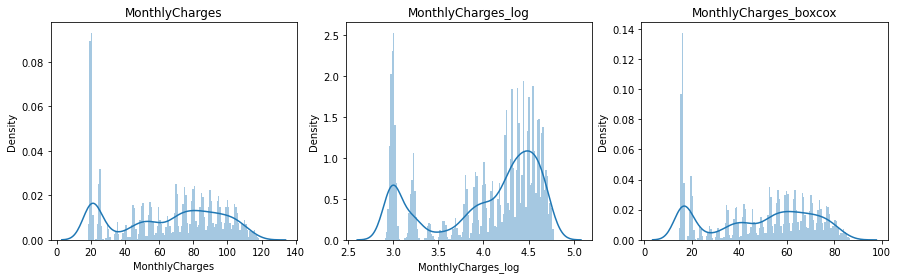

In [18]:
feat_log_box(X,'MonthlyCharges',120)

In [19]:
X.head()

,tenure,SeniorCitizen,MonthlyCharges,MonthlyCharges_log,MonthlyCharges_boxcox
0,1,0,29.85,3.396185,23.578295
1,34,0,56.95,4.042174,43.571734
2,2,0,53.85,3.986202,41.332735
3,45,0,42.30,3.744787,32.892530
4,2,0,70.70,4.258446,53.391036


In [21]:
X = X.drop(['MonthlyCharges_log', 'MonthlyCharges_boxcox'],axis = 1)

In [22]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X_num = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized)

In [24]:
x_norm.head()

,0,1,2
0,0.0,0.033482,0.999439
1,0.0,0.512610,0.858622
2,0.0,0.037115,0.999311
3,0.0,0.728628,0.684910
4,0.0,0.028277,0.999600


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_norm, Y, test_size=0.4, random_state=100)

In [27]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [28]:
classification.score(X_test, y_test)

0.7704045422285308

In [30]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.7704045422285308

In [31]:
y_test.value_counts()

No     2066
Yes     752
Name: Churn, dtype: int64

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1831,  235],
       [ 412,  340]])

In [35]:
pip install imblearn

     |████████████████████████████████| 167 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(x_norm, Y)
y_sm.value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.4, random_state=100)

In [39]:
classification.score(X_test, y_test)

0.721256038647343

In [45]:

from imblearn.under_sampling import TomekLinks
tl = TomekLinks('majority')
### tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(x_norm, Y)
y_tl.value_counts()

No     4674
Yes    1869
Name: Churn, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.4, random_state=100)

In [43]:
classification.score(X_test, y_test)

0.7291825821237586